# Assignment 2: Recommender Systems

## Exploratory Data Analysis

Start with EDA to better understand our dataset and to use appropriate recommender systems.

### Imports & Data Loading

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

user_reviews = pd.read_csv("data/movie_reviews/user_reviews.csv")
movie_genres = pd.read_csv("data/movie_reviews/movie_genres.csv")

### Basic Info

In [61]:
print("User Reviews Dataset:")
print("---------------------")
print(user_reviews.info())

print("\nMovie Genres Dataset:")
print("---------------------")
print(movie_genres.info())

print("---------------------")
print(f"\nUser Reviews Shape: {user_reviews.shape}")
print(f"Movie Genres Shape: {movie_genres.shape}")

User Reviews Dataset:
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 2002 entries, Unnamed: 0 to Hey Arnold! The Movie
dtypes: float64(2000), int64(1), object(1)
memory usage: 9.2+ MB
None

Movie Genres Dataset:
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2000 non-null   int64 
 1   movie_title        2000 non-null   object
 2   genre_action       2000 non-null   int64 
 3   genre_adventure    2000 non-null   int64 
 4   genre_animation    2000 non-null   int64 
 5   genre_biography    2000 non-null   int64 
 6   genre_comedy       2000 non-null   int64 
 7   genre_crime        2000 non-null   int64 
 8   genre_documentary  2000 non-null   int64 
 9   genre_drama        2000 non-null   int64 
 10  genre_family       2000 non-null  

### Remove Unecessary Data

In [62]:
user_reviews.drop(columns=['Unnamed: 0'], inplace=True)
movie_genres.drop(columns=['Unnamed: 0'], inplace=True)

In [63]:
user_reviews.set_index('User', inplace=True)
movie_genres.set_index('movie_title', inplace=True)

In [64]:
user_reviews.head(5)

,The Net,Happily N'Ever After,Tomorrowland,American Hero,Das Boot,Final Destination 3,Licence to Kill,The Hundred-Foot Journey,The Matrix,Creature,...,The Martian,Micmacs,Solomon and Sheba,In the Company of Men,Silent House,Big Fish,Get Real,Trading Places,DOA: Dead or Alive,Hey Arnold! The Movie
User,,,,,,,,,,,,,,,,,,,,,
Vincent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Edgar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Addilyn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marlee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Javier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
movie_genres.head(5)

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,...,genre_mystery,genre_news,genre_reality-tv,genre_romance,genre_sci-fi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
movie_title,,,,,,,,,,,,,,,,,,,,,
The Net,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
Happily N'Ever After,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Tomorrowland,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
American Hero,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Das Boot,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [66]:
print(f"\nUser Reviews Shape: {user_reviews.shape}")
print(f"Movie Genres Shape: {movie_genres.shape}")


User Reviews Shape: (600, 2000)
Movie Genres Shape: (2000, 25)


## Rating Distribution Analysis

Total Users: 600, Total Movies: 2000, Total Genres: 25

Rating Distribution:
 1.0    1058
2.0    2763
3.0    4812
4.0    3732
5.0    4160
Name: count, dtype: int64


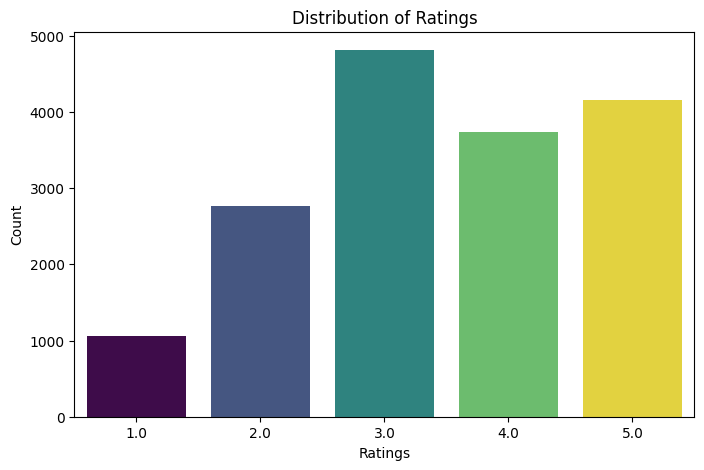

In [73]:
num_users, num_movies = user_reviews.shape
print(f"Total Users: {num_users}, Total Movies: {num_movies}, Total Genres: {movie_genres.shape[1]}")

user_reviews_replaced = user_reviews.replace(0, np.nan) # replace 0s with NaN just for the plot

rating_counts = user_reviews_replaced.stack().value_counts().sort_index()
print("\nRating Distribution:\n", rating_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis", legend=False, hue=rating_counts.index)
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

so we see here that more users are giving higher ratings with the mode being 3.0

## Genre Anaylsis


Movie Genre Distribution:
 genre_drama          1007
genre_comedy          763
genre_thriller        541
genre_romance         464
genre_adventure       368
genre_crime           330
genre_sci-fi          263
genre_fantasy         251
genre_horror          230
genre_family          198
genre_mystery         195
genre_biography       114
genre_animation        95
genre_music            81
genre_war              80
genre_sport            70
genre_history          67
genre_musical          55
genre_documentary      45
genre_western          36
genre_film-noir         4
genre_news              2
genre_short             2
genre_reality-tv        1
dtype: int64


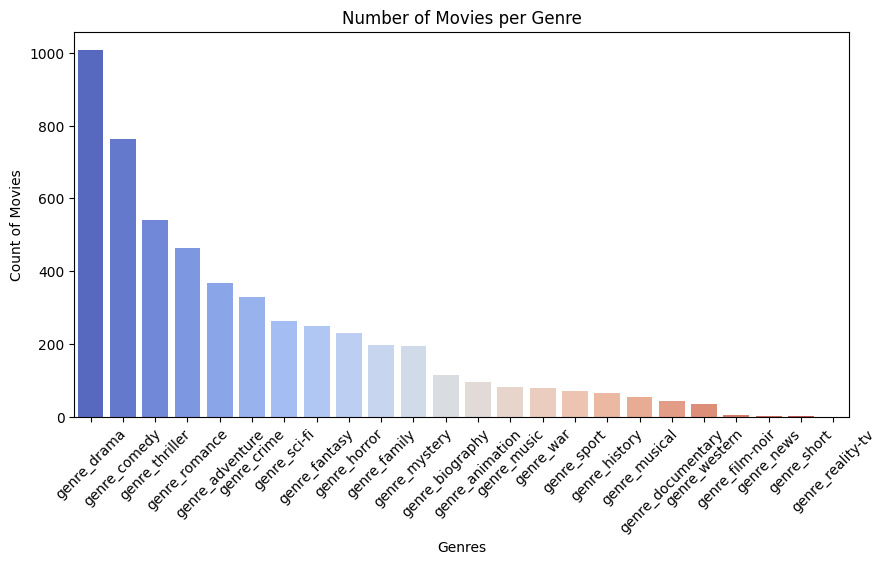

In [ ]:
genre_counts = movie_genres.iloc[:, 1:].sum().sort_values(ascending=False)  # summing binary genre indicators
print("\nMovie Genre Distribution:\n", genre_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm", legend=False, hue=genre_counts.index)
plt.xticks(rotation=45) # better readability
plt.xlabel("Genres")
plt.ylabel("Count of Movies")
plt.title("Number of Movies per Genre")
plt.show()

we see here that most movies in the list are tagged drama

## Sparsity Check for SVD in Collab Filtering

In [77]:
num_missing = user_reviews.isin([0]).sum().sum()
total_cells = num_users * num_movies
sparsity = (num_missing / total_cells) * 100
print(f"\nDataset Sparsity: {sparsity}%")


Dataset Sparsity: 98.62291666666667%


we see here that the dataset is quite sparse, with about 98.6% of the dataset being empty (unrated), which leads us to believe that collaborative filtering methods like matrix factorisation may be needed here.

## User Activity

Top 10 most active users (most ratings given):
---------------------
User
Jane       46
Abraham    44
Evelyn     44
David      43
Sergio     43
Zachary    43
Dante      42
Erin       42
Beau       40
Amina      40
dtype: int64


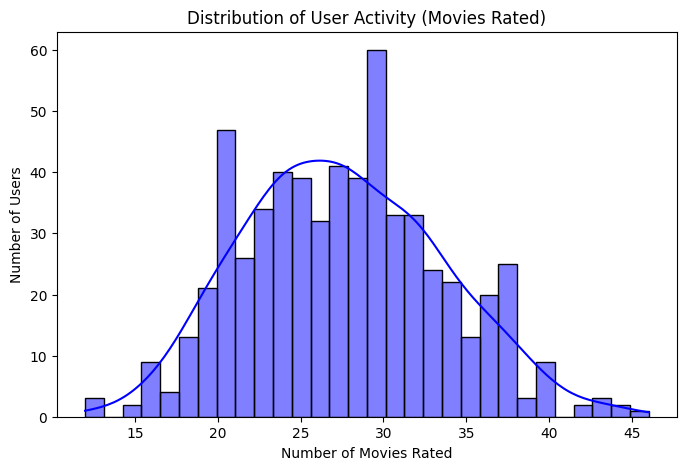

In [80]:
user_activity = (user_reviews != 0).sum(axis=1)

print("Top 10 most active users (most ratings given):")
print("---------------------")
print(user_activity.sort_values(ascending=False).head(10))

plt.figure(figsize=(8, 5))
sns.histplot(user_activity, bins=30, kde=True, color="blue")
plt.xlabel("Number of Movies Rated")
plt.ylabel("Number of Users")
plt.title("Distribution of User Activity (Movies Rated)")
plt.show()

## Movie Popularity

in terms of number of votes per movie, shows which are widely known and rated

Top 10 Most Rated Movies:
---------------------
ATL                          20
Rang De Basanti              20
Observe and Report           20
Dysfunctional Friends        19
Perrier's Bounty             19
The Other End of the Line    19
Furious 7                    19
Creepshow 2                  19
Now You See Me 2             18
American Gangster            18
dtype: int64

Top 10 Least Rated Movies:
---------------------
United 93                                     1
The Wolf of Wall Street                       1
The Ballad of Gregorio Cortez                 1
The Men Who Stare at Goats                    1
Tarnation                                     1
Ted 2                                         1
Goal! The Dream Begins                        1
12 Rounds                                     1
Star Wars: Episode VI - Return of the Jedi    2
Best in Show                                  2
dtype: int64


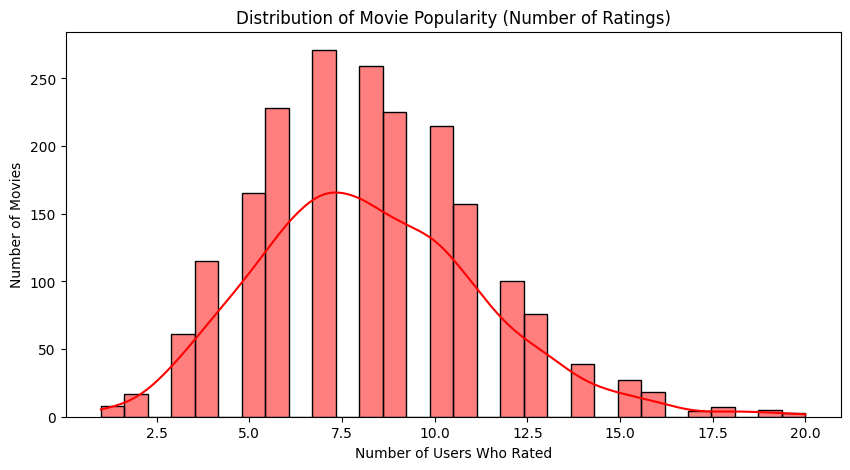

In [81]:
movie_popularity = (user_reviews != 0).sum(axis=0)

print("Top 10 Most Rated Movies:")
print("---------------------")
print(movie_popularity.sort_values(ascending=False).head(10))

print("\nTop 10 Least Rated Movies:")
print("---------------------")
print(movie_popularity.sort_values(ascending=True).head(10))

plt.figure(figsize=(10, 5))
sns.histplot(movie_popularity, bins=30, kde=True, color="red")
plt.xlabel("Number of Users Who Rated")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Popularity (Number of Ratings)")
plt.show()

## Genre-Based User Preferences


Average User Ratings per Genre:
genre_drama          1.980454
genre_comedy         1.380635
genre_thriller       1.061120
genre_romance        0.929259
genre_action         0.869228
genre_crime          0.689380
genre_adventure      0.666868
genre_sci-fi         0.459667
genre_fantasy        0.445083
genre_mystery        0.371800
genre_family         0.344932
genre_horror         0.336460
genre_biography      0.203691
genre_animation      0.176339
genre_war            0.152980
genre_music          0.144085
genre_sport          0.115340
genre_history        0.112980
genre_musical        0.093918
genre_western        0.057126
genre_documentary    0.038790
genre_film-noir      0.006293
genre_reality-tv     0.001573
genre_news           0.001513
genre_short          0.001392
dtype: float64


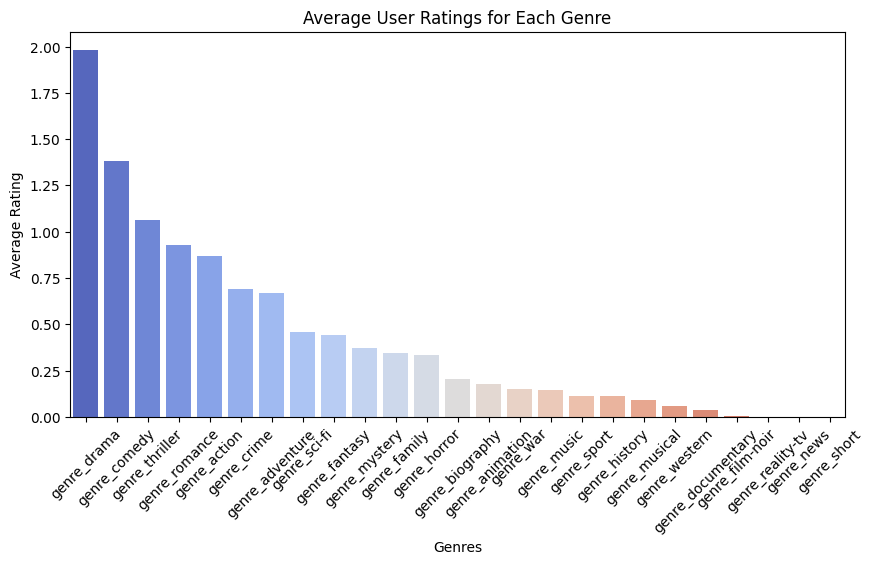

In [83]:
movies = user_reviews.columns
movie_genres["Movie"] = movies  # combine movie titles to movie_genres

ratings_long = user_reviews.melt(id_vars=[], var_name="Movie", value_name="Rating") # melt to long form
ratings_long = ratings_long[ratings_long["Rating"] > 0]  # remove missing ratings

ratings_with_genres = ratings_long.merge(movie_genres, on="Movie", how="left")

genre_ratings = ratings_with_genres.iloc[:, 2:].multiply(ratings_with_genres["Rating"], axis=0)
avg_genre_ratings = genre_ratings.mean().sort_values(ascending=False)

print("\nAverage User Ratings per Genre:")
print(avg_genre_ratings)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_genre_ratings.index, y=avg_genre_ratings.values, palette="coolwarm", legend=False, hue=avg_genre_ratings.index)
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Average Rating")
plt.title("Average User Ratings for Each Genre")
plt.show()

# Hybrid Recommender System

In [85]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Replace 0s with NaN for better handling
ratings_matrix = user_reviews.replace(0, np.nan)

# Normalize ratings (subtract mean per user)
user_means = ratings_matrix.mean(axis=1)
normalized_ratings = ratings_matrix.sub(user_means, axis=0)

# Fill NaN with 0 for matrix factorization
ratings_filled = normalized_ratings.fillna(0)

print("Preprocessing complete: Data prepared for Collaborative Filtering.")

Preprocessing complete: Data prepared for Collaborative Filtering.


## Collaborative Filtering with SVD

In [91]:
from sklearn.decomposition import PCA

pca = PCA(n_components=optimal_components)
latent_matrix = pca.fit_transform(ratings_filled)

# optimal_components = min(200, user_reviews.shape[0] - 1, user_reviews.shape[1] - 1)
# svd = TruncatedSVD(n_components=optimal_components, random_state=42)
# latent_matrix = svd.fit_transform(ratings_filled)

movie_similarity = cosine_similarity(latent_matrix.T)

# similarity dataFrame
movie_sim_df = pd.DataFrame(movie_similarity, index=user_reviews.columns, columns=user_reviews.columns)

print("SVD-based Collaborative Filtering Model Trained.")

ValueError: Shape of passed values is (200, 200), indices imply (2000, 2000)

## Content-Based Filtering

In [ ]:
genre_sim = cosine_similarity(movie_genres.iloc[:, 1:])  # ignore movie title column

# genre similarity dataFrame
genre_sim_df = pd.DataFrame(genre_sim, index=user_reviews.columns, columns=user_reviews.columns)

print("Content-Based Filtering Model Trained (Genre Similarity).")

## Combining Content-Based Filtering with SVD

In [ ]:
def hybrid_recommend(user_name, top_n=5):
    user_idx = user_reviews.index[user_reviews.index == user_name][0]
    user_ratings = ratings_matrix.loc[user_name]

    # top-rated movies by the user
    rated_movies = user_ratings[user_ratings.notna()].index.tolist()
    
    # aggregate movie recommendations
    movie_scores = {}

    for movie in rated_movies:
        # similar movies from SVD
        similar_movies = movie_sim_df[movie].sort_values(ascending=False)[1:11]  # choose top 10
        
        for sim_movie, sim_score in similar_movies.items():
            if sim_movie not in rated_movies:
                movie_scores[sim_movie] = movie_scores.get(sim_movie, 0) + sim_score

        # content similarity
        genre_similar_movies = genre_sim_df[movie].sort_values(ascending=False)[1:11]
        
        for genre_movie, genre_score in genre_similar_movies.items():
            if genre_movie not in rated_movies:
                movie_scores[genre_movie] = movie_scores.get(genre_movie, 0) + genre_score

    # sort by combined similarity score
    recommended_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)

    return [movie for movie, _ in recommended_movies[:top_n]]

target_users = ["Vincent", "Edgar", "Addilyn", "Marlee", "Javier"]
recommendations = {user: hybrid_recommend(user) for user in target_users}

In [ ]:
for user, movies in recommendations.items():
    print(f"\nRecommended Movies for {user}: {movies}")